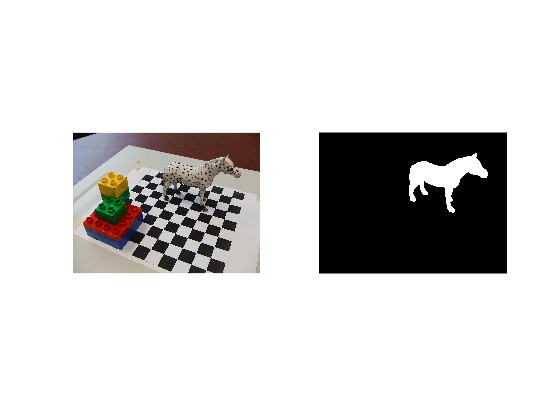

In [1]:
names = dir(fullfile('data','*.jpg'));
maskNames = {};
imgNames = {};
masks = {};
imgs = {};
addpath('data/');
for k = 1:length(names)
    fname = names(k).name;
    if contains(fname, 'Mask')
        maskNames{end + 1} = fname;
        masks{end + 1} = imread(fname);
    else
        imgNames{end + 1} = fname;
        imgs{end + 1} = imread(fname);
    end
end

subplot(1, 2, 1);
imshow(imgs{1});
subplot(1, 2, 2);
imshow(masks{1});

addpath('func/');

In [10]:
addpath('vlfeat/');
run('vlfeat/toolbox/vl_setup');

# Part 1

In [176]:
%%file func/maskFilt.m
function matches = maskFilt(mask, x, y)
    img = zeros(size(mask));
    for i = 1:size(x, 2)
%         img(round(x(:, i)), round(y(:, i))) = i;
        img(round(y(:, i)), round(x(:, i))) = i;
    end
    img(mask == 0) = 0;
    matches = img(img ~= 0);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW3/func/maskFilt.m'.


In [180]:
%%file func/matchPts.m
function [matches, scores] = matchPts(imgs, masks, a, b, drawFlag)
    addpath('func/');
    [fa, da] = vl_sift(im2single(rgb2gray(imgs{a})));
    [fb, db] = vl_sift(im2single(rgb2gray(imgs{b})));
    [matches, scores] = vl_ubcmatch(da, db);
    [drop, perm] = sort(scores, 'descend');
    N = 50;
    perm = perm(1:N);
    matches = matches(:, perm);
    scores = scores(perm);
    
    figure(1);
    clf;
    imagesc(cat(2, imgs{a}, imgs{b}));
    xa = fa(1, matches(1, :));
    xb = fb(1, matches(2, :)) + size(imgs{a}, 2);
    ya = fa(2, matches(1, :));
    yb = fb(2, matches(2, :));
    perma = maskFilt(masks{a}, xa, ya);
    permb = maskFilt(masks{b}, xb - size(imgs{a}, 2), yb);
    perm = intersect(perma, permb);
    matches = matches(:, perm);
    xa = xa(:, perm);
    xb = xb(:, perm);
    ya = ya(:, perm);
    yb = yb(:, perm);
    
    hold on ;
    h = line([xa; xb], [ya; yb]);
    set(h, 'linewidth', 1, 'color', 'b');
    vl_plotframe(fa(:, matches(1, :))) ;
    fb(1, :) = fb(1, :) + size(imgs{a}, 2) ;
    vl_plotframe(fb(:, matches(2, :))) ;
    axis image off;
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW3/func/matchPts.m'.


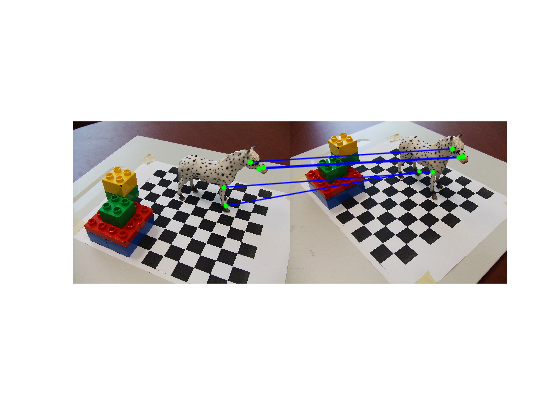

In [183]:
[matches, scores] = matchPts(imgs, masks, 1, 2, true);